In [2]:
import pandas as pd
import numpy as np


np.random.seed(42)

# number of samples
n_samples = 400


ages = np.random.randint(18, 65, size=n_samples)


salaries = np.random.normal(loc=80000, scale=40000, size=n_samples)
salaries = np.clip(salaries, 10000, 200000)



purchase = []
for age, salary in zip(ages, salaries):
    if 25 <= age <= 45 and salary >= 50000:
        prob = 0.75
    elif salary < 40000:
        prob = 0.2
    else:
        prob = 0.4
    purchase.append(np.random.rand() < prob)

purchase = np.array(purchase, dtype=int)


df = pd.DataFrame({
    'Age': ages,
    'EstimatedSalary': salaries.astype(int),
    'Purchased': purchase
})


df.to_csv('insurance_data.csv', index=False)

print("✅ 'insurance_data.csv' generated with 400 synthetic records!")
print(df.head())




✅ 'insurance_data.csv' generated with 400 synthetic records!
   Age  EstimatedSalary  Purchased
0   56            31994          0
1   46           128055          1
2   32            85993          1
3   60            85636          1
4   25            94176          1


   Age  EstimatedSalary  Purchased
0   56            31994          0
1   46           128055          1
2   32            85993          1
3   60            85636          1
4   25            94176          1
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression      0.51   0.592593  0.296296  0.395062  0.631643
1                  KNN      0.74   0.769231  0.740741  0.754717  0.761071
2                  SVM      0.70   0.750000  0.666667  0.705882  0.730274
3        Decision Tree      0.66   0.692308  0.666667  0.679245  0.659420
4        Random Forest      0.69   0.716981  0.703704  0.710280  0.746578


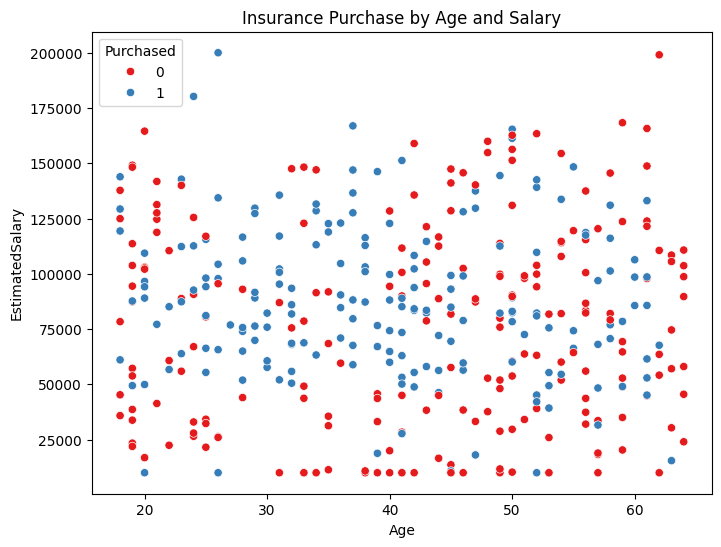

Age: 30, Salary: 87000 => Prediction: No Purchase
Age: 40, Salary: 0 => Prediction: No Purchase
Age: 40, Salary: 100000 => Prediction: Purchase
Age: 50, Salary: 0 => Prediction: No Purchase
Age: 18, Salary: 0 => Prediction: No Purchase
Age: 22, Salary: 600000 => Prediction: No Purchase
Age: 35, Salary: 2500000 => Prediction: Purchase
Age: 60, Salary: 100000000 => Prediction: No Purchase


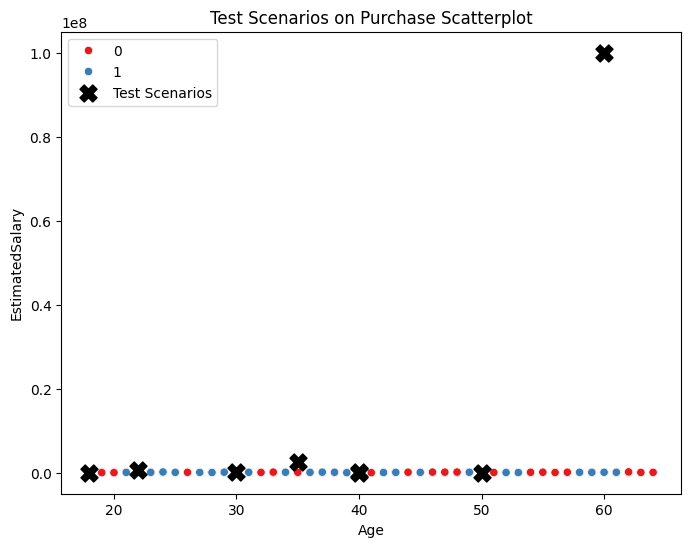

At age 35, predictions with varying salary: [0 0 0 0 0 1 1 0 1 1]
At salary 100,000, predictions with varying age: [0 1 1 1 1 1 0 0 1 0]


In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


df = pd.read_csv('insurance_data.csv')


print(df.head())


print(df.isnull().sum())


X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values


sc = StandardScaler()
X_scaled = sc.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}


results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model,"predict_proba") else model.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC': roc
    })

results_df = pd.DataFrame(results)
print(results_df)


plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Age'], y=df['EstimatedSalary'], hue=df['Purchased'], palette="Set1")
plt.title("Insurance Purchase by Age and Salary")
plt.show()


best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)


scenarios = [
    [30, 87000],
    [40, 0],
    [40, 100000],
    [50, 0],
    [18, 0],
    [22, 600000],
    [35, 2500000],
    [60, 100000000]
]


scenarios_scaled = sc.transform(scenarios)


scenario_preds = best_model.predict(scenarios_scaled)


for idx, (age, salary) in enumerate(scenarios):
    print(f"Age: {age}, Salary: {salary} => Prediction: {'Purchase' if scenario_preds[idx]==1 else 'No Purchase'}")


scenarios_df = pd.DataFrame(scenarios, columns=["Age", "EstimatedSalary"])
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Age'], y=df['EstimatedSalary'], hue=df['Purchased'], palette="Set1")
plt.scatter(scenarios_df['Age'], scenarios_df['EstimatedSalary'], color='black', s=150, marker='X', label="Test Scenarios")
plt.legend()
plt.title("Test Scenarios on Purchase Scatterplot")
plt.show()


# 7. Hypothesis Testing (example)

# fix age = 35, vary salary
ages = np.repeat(35, 10)
salaries = np.linspace(0, 200000, 10)
test_variation = np.column_stack((ages, salaries))
test_variation_scaled = sc.transform(test_variation)
preds = best_model.predict(test_variation_scaled)
print(f"At age 35, predictions with varying salary: {preds}")


# fix salary = 100,000, vary age
ages = np.arange(20, 70, 5)
salaries = np.repeat(100000, len(ages))
test_variation2 = np.column_stack((ages, salaries))
test_variation2_scaled = sc.transform(test_variation2)
preds2 = best_model.predict(test_variation2_scaled)
print(f"At salary 100,000, predictions with varying age: {preds2}")

